In [1]:
# Importing libraries
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Directory name where the dataset files will be stored
DATA_DIR = "data"

# Check if the directory already exists
# If it does NOT exist, create it
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

# Dictionary containing:
# key - filename to save locally
# value - URL from where the file will be downloaded
URLS = {
    'KDDTrain+.txt': 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt',
    'KDDTest+.txt':  'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt'
}

# Function to download a file from a given URL
def download_file(url, filename):

    # Create full local file path (e.g., data/KDDTrain+.txt)
    local_path = os.path.join(DATA_DIR, filename)

    # If file already exists, do not download again
    if os.path.exists(local_path):
        print(f"Correct file found: {filename} already exists")
        return

    # Inform the user that download is starting
    print(f"Downloading {filename}...")

    try:
        # Send HTTP GET request to download the file
        response = requests.get(url, stream=True)

        # Raises an error if the request failed 
        response.raise_for_status()

        # Open the file in binary write mode
        with open(local_path, 'wb') as f:

            # Read the response in chunks to avoid memory overload
            for chunk in response.iter_content(chunk_size=8000):
                f.write(chunk)
        print(f"Success: saved to {local_path}")

    except Exception as e:
        # Handle any error during download or file writing
        print(f"Failed to download {filename}: {e}")


In [3]:
# Loop through each key-value pair in the URLS dictionary
for filename, url in URLS.items():
    
    # Call the download function for each file
    download_file(url, filename)
print("\nAll files should now be in 'data' folder")

Correct file found: KDDTrain+.txt already exists
Correct file found: KDDTest+.txt already exists

All files should now be in 'data' folder


In [4]:
# Define the standard column names for the NSL-KDD dataset
COLUMNS = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", 
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", 
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "class", "difficulty_level"
]

In [5]:
# Define the training and testing path
train_path = os.path.join(DATA_DIR, 'KDDTrain+.txt')
test_path = os.path.join(DATA_DIR, 'KDDTest+.txt')

# Read CSV with our column names
train_df = pd.read_csv(train_path, names=COLUMNS)
test_df = pd.read_csv(test_path, names=COLUMNS)

print("Data Loaded Successfully!")

Data Loaded Successfully!


In [6]:
# Display first 5 rows of training data
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
# Display first 5 rows of testing data
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [8]:
# Display last 5 rows of training data
train_df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [9]:
# Display last 5 rows of testing data
test_df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan,14


In [10]:
# Define output paths
train_output_path = os.path.join(DATA_DIR, 'KDDTrain_with_columns.csv')
test_output_path  = os.path.join(DATA_DIR, 'KDDTest_with_columns.csv')

# Save datasets with column names
train_df.to_csv(train_output_path, index=False)
test_df.to_csv(test_output_path, index=False)

print("Training and testing datasets saved successfully with column names.")


Training and testing datasets saved successfully with column names.


In [11]:
# Describe the train dataset
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
# Describe the test dataset
test_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
#Print data informtion of train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [14]:
#Print data informtion of test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [15]:
# Sum of missing values in both train and test dataset
print(f"Missing Values in teh Training Data: {train_df.isnull().sum().sum()}")
print(f"Missing Values in teh Testing Data: {test_df.isnull().sum().sum()}")

Missing Values in teh Training Data: 0
Missing Values in teh Testing Data: 0


In [16]:
# Checking sum of duplicate data present in both train and test dataset
print(f"Duplicate data in the training dataset {train_df.duplicated().sum()}")
print(f"Duplicate data in the test dataset {test_df.duplicated().sum()}")

Duplicate data in the training dataset 0
Duplicate data in the test dataset 0


In [17]:
# Target variable is 'class'
train_df['class']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: class, Length: 125973, dtype: object

In [18]:
# Listing the unique labels
unique_labels = train_df['class'].unique()
print(f" There are {len(unique_labels)} unique lables including 'normal'.")
print(unique_labels)

 There are 23 unique lables including 'normal'.
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [19]:
# Listing the count of each unique label
train_df['class'].value_counts()

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [20]:
#Listing the values of the 'class' column
train_df['class']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: class, Length: 125973, dtype: object

In [21]:
# Listing the Unique values present in the 'class' column
unique_labels = train_df['class'].unique()
print(f" There are {len(unique_labels)} unique lables including 'normal'.")
print(unique_labels)

 There are 23 unique lables including 'normal'.
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [22]:
#Count of each unique value present in 'Class' column
train_df['class'].value_counts()

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [23]:
# Reading the csv file with coulmn names
import pandas as pd
df = pd.read_csv("data/KDDTrain_with_columns.csv")

In [24]:
# Display the first 5 rows
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [25]:
#Sum of duplicated values present
df.duplicated().sum()

np.int64(0)

In [26]:
#List the unique values present in 'protocol_type' colunmn
df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [27]:
# List 'protocol_type' column
df['protocol_type']

0         tcp
1         udp
2         tcp
3         tcp
4         tcp
         ... 
125968    tcp
125969    udp
125970    tcp
125971    tcp
125972    tcp
Name: protocol_type, Length: 125973, dtype: object

In [28]:
# Creating a new dataframe with'duration','protocol_type','class' columns and listing the first 5 columns
subset = df[['duration','protocol_type','class']]
subset.head()

,duration,protocol_type,class
0,0,tcp,normal
1,0,udp,normal
2,0,tcp,neptune
3,0,tcp,normal
4,0,tcp,normal


In [29]:
# List the unique values of 'protocol type' column
df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [30]:
# Count of tcp traffic
tcp_traffic = df[df['protocol_type'] == 'tcp']
print(f"Traffic of the TCP Count is: {len(tcp_traffic)}")

Traffic of the TCP Count is: 102689


In [31]:
# Count of udp traffic
udp_traffic = df[df['protocol_type'] == 'udp']
print(f"Traffic of the UDP Count is: {len(udp_traffic)}")

Traffic of the UDP Count is: 14993


In [32]:
# # Count of icmp traffic
icmp_traffic = df[df['protocol_type'] == 'icmp']
print(f"Traffic of the ICMP Count is: {len(icmp_traffic)}")

Traffic of the ICMP Count is: 8291


In [33]:
# Unique values of 'land' column
df['land'].unique()

array([0, 1])

In [34]:
# Count of Land attacks
land_attack = df[df['land']==1]
print(f"Land attacks Found are: {len(land_attack)}")

Land attacks Found are: 25


In [35]:
# Slicing the dataset
first_ten_rows = df.iloc[0:30]
first_ten_rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [36]:
# Unique values of 'service' column
df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [37]:
# Count of every value in the 'class' column
print(df['class'].value_counts())

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [38]:
print("\nAverage Duration by the Protocols")
print(df.groupby('protocol_type')['duration'].mean())


Average Duration by the Protocols
protocol_type
icmp      0.000000
tcp     281.386419
udp     485.372040
Name: duration, dtype: float64


In [39]:
df[df['protocol_type']=='icmp']['src_bytes']

17          18
30           8
56           8
72         181
83           8
          ... 
125927    1032
125935      30
125942      30
125947      18
125956      30
Name: src_bytes, Length: 8291, dtype: int64

In [40]:
protocol_counts = df['protocol_type'].value_counts()
protocol_counts

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

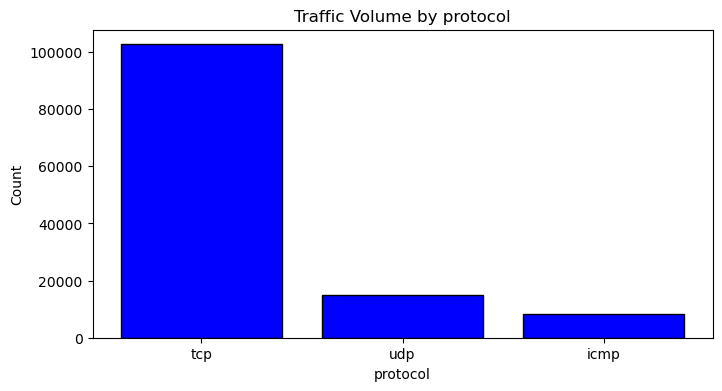

In [41]:
import matplotlib.pyplot as plt

protocol_counts = df['protocol_type'].value_counts()
protocol_counts

def set_plot(title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
plt.figure(figsize=(8,4))
plt.bar(protocol_counts.index,protocol_counts.values,color = "blue",edgecolor = "black")
set_plot("Traffic Volume by protocol","protocol","Count")
plt.show()

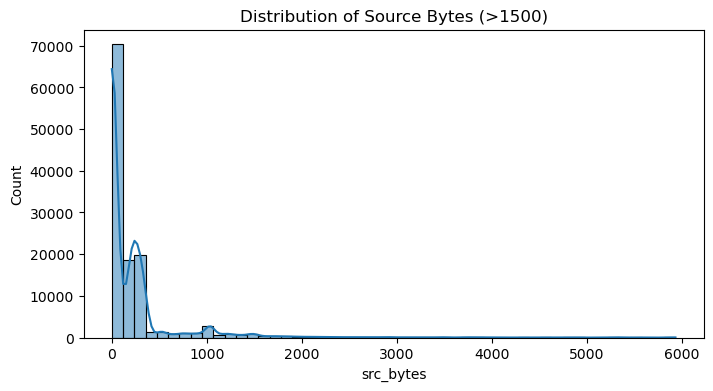

In [42]:
import seaborn as sns
small_bytes = df[df['src_bytes']<6000]
small_bytes

plt.figure(figsize = (8,4))
sns.histplot(small_bytes['src_bytes'],bins = 50, kde=True)
plt.title("Distribution of Source Bytes (>1500)")
plt.show()

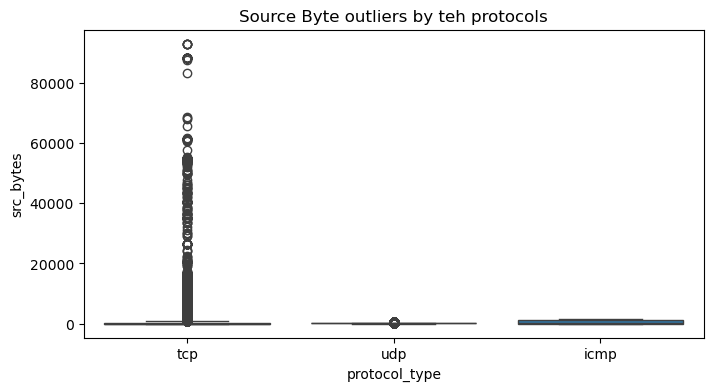

In [43]:
plt.figure(figsize = (8,4))
small_bytes = df[df['src_bytes']<100000]

sns.boxplot(x = 'protocol_type',y = 'src_bytes',data = small_bytes)
plt.title("Source Byte outliers by teh protocols")
plt.show()

In [44]:
print(df['protocol_type'].value_counts())

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64


In [45]:
ct = pd.crosstab(df['protocol_type'],df['flag'])
ct

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
protocol_type,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,8291,0
tcp,46,11233,1562,103,2421,34851,365,127,49,51661,271
udp,0,0,0,0,0,0,0,0,0,14993,0


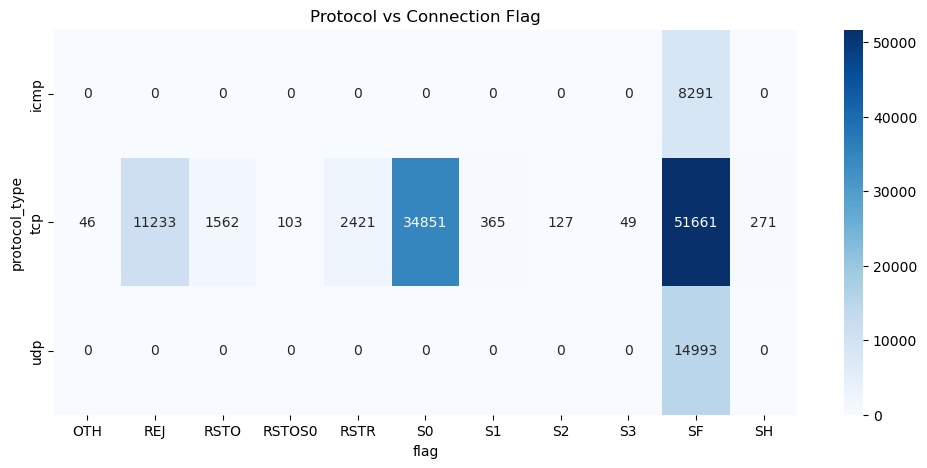

In [46]:
plt.figure(figsize=(12,5))
sns.heatmap(ct,annot = True, fmt='d', cmap='Blues')
plt.title("Protocol vs Connection Flag")
plt.show()

In [47]:
# Check null values in 'src_bytes' column
df['src_bytes'].isnull().sum()

np.int64(0)

In [48]:
# Count of the values in 'src_bytes' columns
df['src_bytes'].value_counts()

src_bytes
0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
2282         1
36696        1
2427         1
2633         1
13425        1
Name: count, Length: 3341, dtype: int64

In [49]:
# Analyze how zero src_bytes values are distributed across different network protocols
pd.crosstab(df['protocol_type'], df['src_bytes'] == 0)

src_bytes,False,True
protocol_type,,
icmp,8291,0
tcp,53297,49392
udp,14993,0


In [52]:
import numpy as np
# Apply log transformation to reduce skewness in src_bytes while preserving zero values
df['src_bytes_log'] = np.log1p(df['src_bytes'])

In [54]:
# Compare original and log-transformed src_bytes distributions
df[['src_bytes', 'src_bytes_log']].describe()

,src_bytes,src_bytes_log
count,1.259730e+05,125973.000000
mean,4.556674e+04,3.229669
std,5.870331e+06,2.982191
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,4.400000e+01,3.806662
75%,2.760000e+02,5.624018
max,1.379964e+09,21.045323


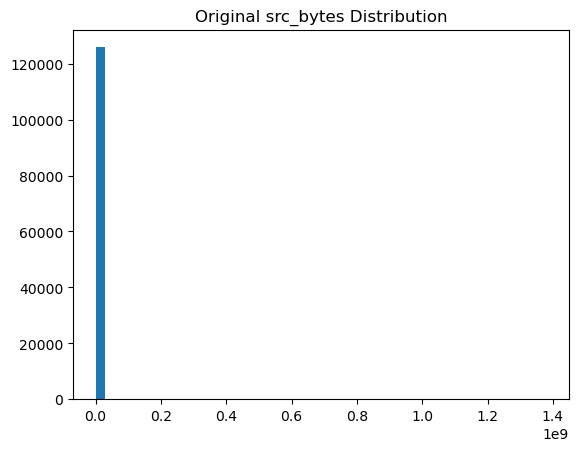

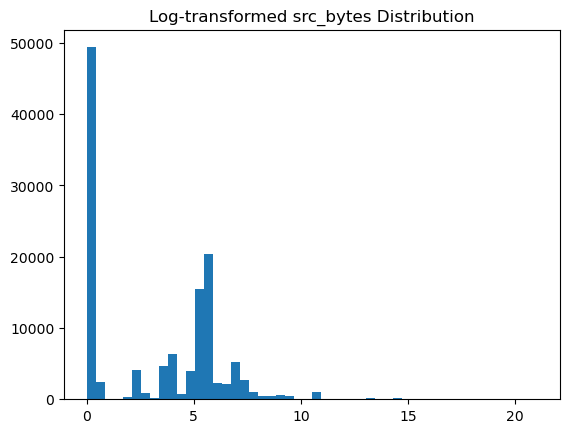

In [55]:
import matplotlib.pyplot as plt

plt.hist(df['src_bytes'], bins=50)
plt.title("Original src_bytes Distribution")
plt.show()

plt.hist(df['src_bytes_log'], bins=50)
plt.title("Log-transformed src_bytes Distribution")
plt.show()
